In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [153]:
import csv
fake = pd.read_csv("Fake.csv",on_bad_lines='skip')
true = pd.read_csv("True.csv",on_bad_lines='skip')


In [154]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [155]:
#Creating a category for whether fake or not
#where 1 stand for fake news and 0 stands for true news

fake["category"]=1
true["category"]=0

In [156]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


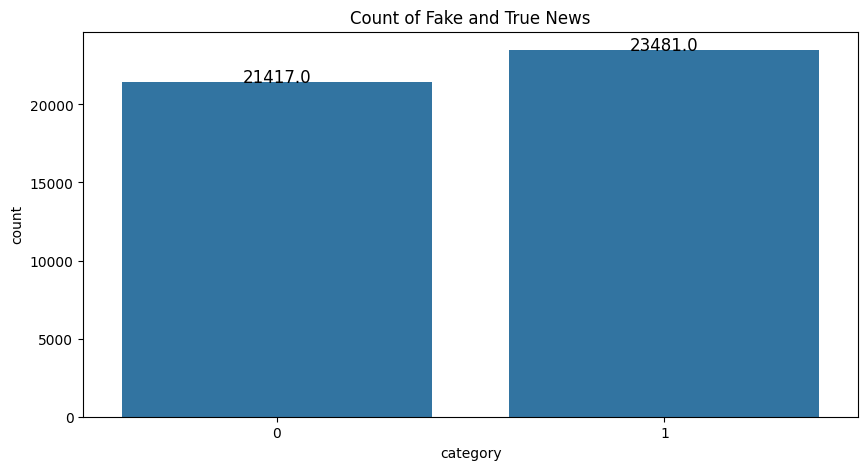

In [158]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
# # graph.spines["right"].set_visible(False)
# graph.spines["top"].set_visible(False)
# graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

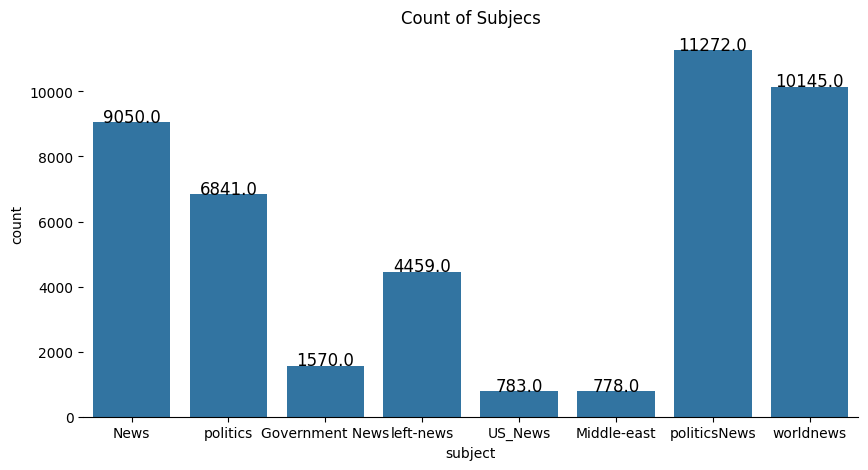

In [159]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

# Data Cleaning

In [160]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [161]:
df["text"]

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44893    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44894    LONDON (Reuters) - LexisNexis, a provider of l...
44895    MINSK (Reuters) - In the shadow of disused Sov...
44896    MOSCOW (Reuters) - Vatican Secretary of State ...
44897    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44898, dtype: object

In [162]:
#checking if there is empty string in TEXT column
blanks=[]
index=0;
#index,label and review of the doc
for text in df["text"]: # it will iter through index,label and review
    if text.isspace(): # if there is a space
        blanks.append(index) #it will be noted down in empty list
    index=index+1

len(blanks)

631

In [163]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [164]:
df["text"][10922]

'This Congresswoman has a potty mouth and a bitter attitude towards whites. She s a hateful racist who is paranoid that everyone is out to get her. She just tossed baseless accusations at the Trump administration in an appearance on The Washington Post podcast  Cape Up with Jonathan Capehart.  (See our previous report on the interview below.)Here are the lowlights:Waters accused President Trump of colluding with Russia during the 2016 election, without offering evidence.  I believe this President has colluded with the Russians, with the Kremlin, with the oligarchs, perhaps, of Russia to undermine our election systems,  Waters told Capehart. (4:00) The California congresswoman also criticized the Senate investigation into Trump-Russia ties as not credible.  They re not moving fast enough!  she exclaimed. However, she praised the media for their investigations into Trump-Russia ties. (4:35) Waters described Attorney General Jeff Sessions as a  throwback to the days of Jim Crow,  equating

In [165]:
#instead of dropping these values we are going to merge title with text

df["text"] =df["title"]+df["text"]

#we only need two columns rest can be ignored

df=df[["text","category"]]

In [166]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re


### Stopwords
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

### Lemmatisation
lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [167]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [168]:
#creating list of stopwords containing stopwords from spacy and nltk
import nltk
nltk.download('stopwords')

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
#text cleaning function
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string


In [170]:
#cleaning the whole data
import nltk
nltk.download('wordnet')
df["text"]=df["text"].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [171]:
from wordcloud import WordCloud

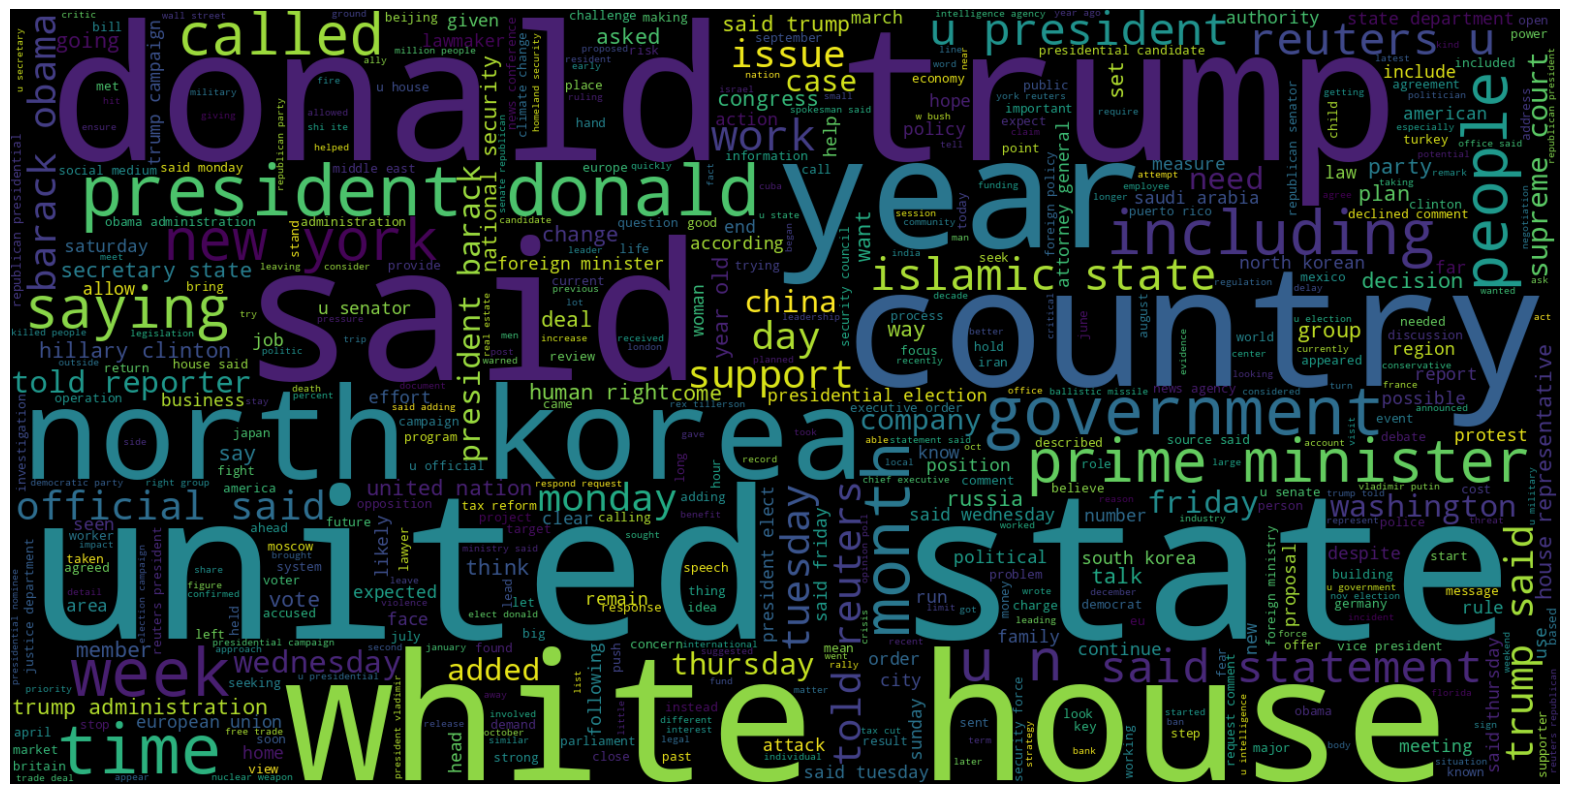

In [172]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [173]:
#creating more intiuive wordcloud

#pil is pillow and used for image manupulation
from PIL import Image


In [174]:
#creating a mask of thumb
thumb="thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

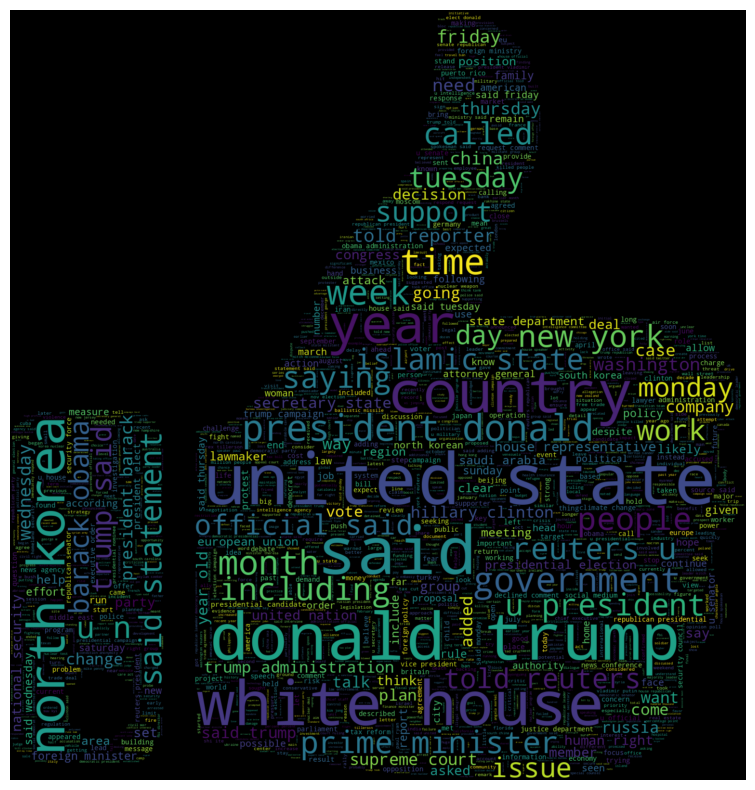

In [175]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [176]:
#creating word cloud using skull image for fake news which depict that
#fake news are dangerous

skull="skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

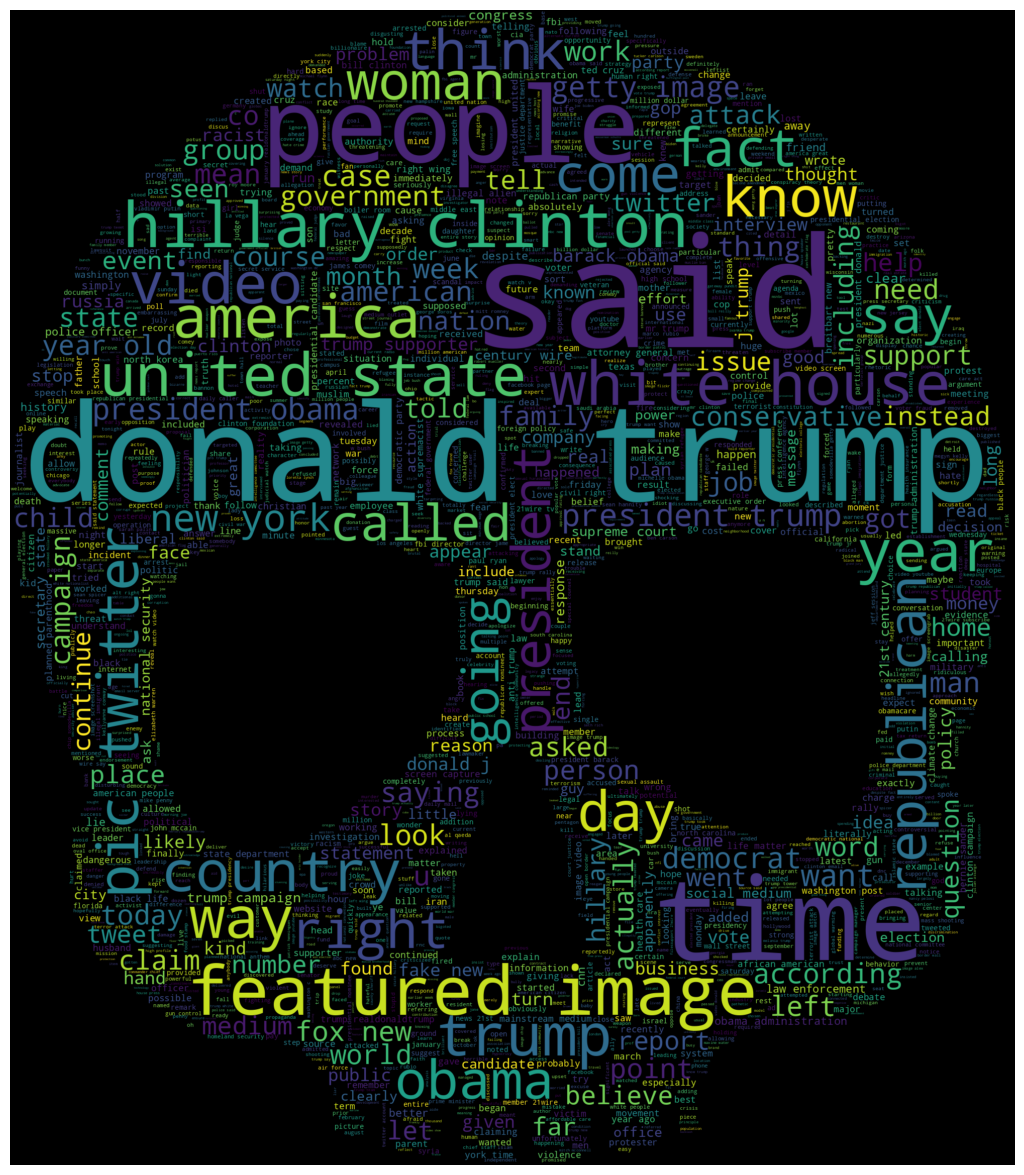

In [177]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

#  Feature-Extraction & Model building


In [178]:
#splitting the
from sklearn.model_selection import train_test_split


X=df["text"] #feature
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [179]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [180]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [181]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [182]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7478
           1       0.99      0.99      0.99      8237

    accuracy                           0.99     15715
   macro avg       0.99      0.99      0.99     15715
weighted avg       0.99      0.99      0.99     15715



In [183]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9937639198218263


In [184]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[7433   45]
 [  53 8184]]
